# DRAFT Eutrophication Demonstrator tutorial #

This example notebook shows how Tier 2 Eutrophication datasets held on the Climate Data Store (CDS) can be used to generate additional visualisations such as anomalies over the growing season.


In this notebook we will download the eutrophication data from the CDS and load it into the notebook with the xarray package (http://xarray.pydata.org/en/stable/index.html). We can then use xarray's tools to process the raw data into seasonal statistics and visualise these using the geoviews package (http://geo.holoviews.org).

In [1]:

import numpy as np
import xarray as xr

import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
import cartopy.feature as cfeature
import holoviews as hv
from holoviews.operation.datashader import regrid

hv.notebook_extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# Fix the path to load our local packages
import sys
#sys.path.append('/local/petwa/source/git/c3s-mcf/c3s-mcf')
print(sys.path)
# Some useful colourmaps for plotting
from cmocean import cm
from cdslibs import cdshelper

['', '/home/jovyan/work/c3smcf/notebooks', '/home/jovyan/work/c3smcf/notebooks', '/home/jovyan/work/python_libs', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython']


In [4]:
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'

In [5]:
%opts Image {+framewise} [colorbar=True, ] Curve [xrotation=60]
%output max_frames=100000

In [6]:
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor='#C0E8C0')

Fetch the Eutrophication dataset. For this example we will use a helper function. See xxx for instructions on accessing data from the CDS and performing simple xarray processing on it.

In [7]:
xr_ensemble = cdshelper.get_eutrophication()

2019-06-13 11:19:29,788 INFO Sending request to https://cds-test.climate.copernicus.eu/api/v2/resources/test-sis-fisheries-eutrophication
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2019-06-13 11:19:34,982 INFO Request is completed
2019-06-13 11:19:34,985 INFO Downloading http://136.156.132.96/cache-compute-0001/cache/data2/dataset-test-sis-fisheries-eutrophication-39324d73-9dc2-4245-8fc4-d817b1761186.zip to /tmp/tmpkqi5yz3c/CMEMS_eutrophication.zip (40.4M)
2019-06-13 11:19:36,132 INFO Download rate 35.3M/s
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanc

anomaly-2008
anomaly-2013
anomaly-2006
anomaly-2014
anomaly-2015
anomaly-2012
anomaly-2007
anomaly-2010
anomaly-2011
anomaly-2016
anomaly-2009


## Calculate the median anomaly values for the growing season (March to September). ##
As the dataset is broken up into yearly sections this is quite easy to do by looping through each year and using the "sel" method to slice out the months we are interested in.
We then assemble all the years into a single xarray for further processing. 

In [8]:
season = {}
for i in [str(x) for x in range(2006, 2017)]:
    season[i] = xr_ensemble['anomaly-'+i].sel(time=slice(i+'-03-01',i+'-09-01')).median(dim='time')

seasons = xr.concat(season.values(),'time')
seasons.coords['time'] = ('time', range(2006,2017))

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Create a Geoviews dataset containing our data plus additional information which makes it easy to plot

In [9]:
# The coordinates of the data values are lat, lon and time.
kdims = [hv.Dimension(('time', 'Year')), 'lon', 'lat']

# our variable is called "anomaly"
vdims = hv.Dimension(('anomaly','Anomaly over season'))

# Create a dataset for visualisation with the anomaly scale set between -0.5 and 0.5
gvds = gv.Dataset(seasons, 
                  kdims=kdims, 
                  vdims=vdims, 
                  crs=crs.PlateCarree()).redim.range(anomaly=(-0.5, 0.5))


We can now use Geoviews to plot the data. 

Here we create 2 plots. 
The first is a map of the anomaly data over the whole area. As the time dimension has been left out of the plot, Geoviews helpfully provides a time slider to allow us to easily move through the images.
The 2nd plot shows a time series of the mean anomaly for the whole image. This will not vary with the slider.

In [10]:
# Make an map of the data
img1 = gvds.to(gv.Image, ['lon', 'lat'], 
               label='Area', 
               group='anomaly map').options(cmap='bwr', 
                                            fig_size=200) * gv.Feature(land_10m)

# and a time series plot of the mean of all the values for the year.
plt1 = hv.Curve(gvds.aggregate(dimensions='time', 
                               function=np.nanmean), 
                kdims=['time'], 
                label='Area', 
                group='mean anomaly').redim.range(anomaly=(-0.0,0.15))

# assemble the components into a single layout
layout = hv.Layout([img1, plt1]).cols(1).options(fig_size=200).opts(title='Anomaly over growing season. {dimensions}')

# and display it.
layout

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


:Layout
   .Anomaly_map.Area  :HoloMap   [time]
      :Overlay
         .Anomaly_map.Area :Image   [lon,lat]   (anomaly)
         .Feature.I        :Feature   [Longitude,Latitude]
   .Mean_anomaly.Area :Curve   [time]   (anomaly)

**Figure 1.** Growing Season Chl P90 anomaly, 2006-2016, for NW Atlantic and Mediterranean Sea

We can also use xarray the subset specific spatial areas to run our statistics on.  
In this case we have a mask file which contains 2 ICES regions. We will use this to generate the region specific statistics side by side for comparison.

In [15]:
# Load the mask data
ospar = xr.open_dataset("../../data/ICESseasHires.nc")

# Add some extra metadata so that xarray know how to access the coordinates.
ospar = ospar.assign_coords(lon=ospar.longitude).assign_coords(lat=ospar.latitude)

We can now display the mask as a map.

In [16]:
kdims = ['lon', 'lat']
vdims = hv.Dimension(('AllSeas','ICES codes'))
gvds_ospar = gv.Dataset(ospar, kdims=kdims, vdims=vdims)

:Overlay
   .Image.I   :Image   [lon,lat]   (AllSeas)
   .Feature.I :Feature   [Longitude,Latitude]
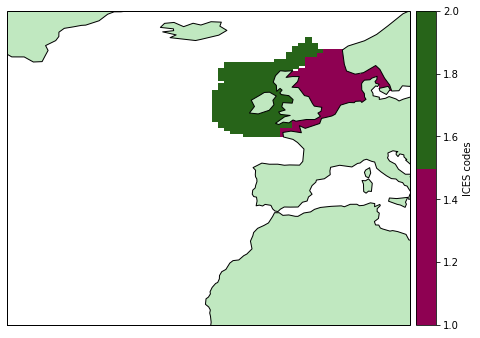

In [17]:
gvds_ospar.to(gv.Image, 
              ['lon', 'lat']).options(cmap='PiYG', 
                                      color_levels=2, 
                                      fig_size=200) * gv.Feature(land_10m)

**Figure 2.** Mask for ICES Regions 1 and 2

We can now generate 2 new datasets masked for each area.

In [18]:
seasons_masked1 = seasons.where(ospar.AllSeas==1.0)
seasons_masked2 = seasons.where(ospar.AllSeas==2.0)

and subset the spatial range to zoom in on the region of interest.

In [19]:
kdims = [hv.Dimension(('time', 'Year')), 'lon', 'lat']
vdims = hv.Dimension(('anomaly','Anomaly over season'))
gvds_ospar2s = gv.Dataset(seasons_masked2, 
                         kdims=kdims, 
                         vdims=vdims, 
                         crs=crs.PlateCarree()).select(lat=slice(47.5,60.0),
                                                       lon=slice(-17.0,1.0)).redim.range(anomaly=(-0.5, 0.5))

gvds_ospar1s = gv.Dataset(seasons_masked1, 
                         kdims=kdims, 
                         vdims=vdims, 
                         crs=crs.PlateCarree()).select(lat=slice(47.5,62.5), 
                                                       lon=slice(-5.0,5.0)).redim.range(anomaly=(-0.5, 0.5))

Assemble images, side by side, and display. We can also refine the scale of the plot to make it more suitable for the specific data.

In [20]:
img1 = gvds_ospar1s.to(gv.Image, 
                      ['lon', 'lat'], 
                      label='Region 1', 
                      group='anomaly map').options(cmap='bwr', 
                                                   fig_size=200) * gv.Feature(land_10m)
img2 = gvds_ospar2s.to(gv.Image, 
                      ['lon', 'lat'], 
                      label='Region 2', 
                      group='anomaly map').options(cmap='bwr', 
                                                   fig_size=200)* gv.Feature(land_10m)
plt1 = hv.Curve(gvds_ospar1s.aggregate(dimensions='time', 
                                      function=np.nanmean), 
                kdims=['time'], 
                label='Region 1', 
                group='mean anomaly').redim.range(anomaly=(-0.1,0.25))
plt2 = hv.Curve(gvds_ospar2s.aggregate(dimensions='time', 
                                      function=np.nanmean), 
                kdims=['time'], 
                label='Region 2', 
                group='mean anomaly').redim.range(anomaly=(-0.1,0.25))
layout = hv.Layout([img1, img2, plt1, plt2]).cols(2).opts(title='Anomaly over season. {dimensions}')
print(layout.opts.get())
layout

Options(axiswise=False, framewise=False, sublabel_format='{Alpha}', title='Anomaly over season. {dimensions}')


:Layout
   .Anomaly_map.Region_1  :HoloMap   [time]
      :Overlay
         .Anomaly_map.Region_1 :Image   [lon,lat]   (anomaly)
         .Feature.I            :Feature   [Longitude,Latitude]
   .Anomaly_map.Region_2  :HoloMap   [time]
      :Overlay
         .Anomaly_map.Region_2 :Image   [lon,lat]   (anomaly)
         .Feature.I            :Feature   [Longitude,Latitude]
   .Mean_anomaly.Region_1 :Curve   [time]   (anomaly)
   .Mean_anomaly.Region_2 :Curve   [time]   (anomaly)

**Figure 3.** Growing Season Chl P90 anomaly, 2006-2016, for ICES Regions 1 and 2

We can also perform similar processing on a per month basis. In this case we will repeat the regional processing but limit our temporal selection to the month of August.

In [21]:
month = {}
month_name = 'August'
month_code = '-08-01'
for i in [str(x) for x in range(2006, 2017)]:
    month[i] = xr_ensemble['anomaly-'+i].sel(time=i+month_code)

months = xr.concat(month.values(),'time')
months.coords['time'] = ('time', range(2006,2017))

In [22]:
months_masked1 = months.where(ospar.AllSeas==1.0)
months_masked2 = months.where(ospar.AllSeas==2.0)

In [23]:
kdims = [hv.Dimension(('time', 'Year')), 'lon', 'lat']
vdims = hv.Dimension(('anomaly','Anomaly for ' + month_name))
gvds_ospar2m = gv.Dataset(months_masked2, 
                         kdims=kdims, 
                         vdims=vdims, 
                         crs=crs.PlateCarree()).select(lat=slice(47.5,60.0),
                                                       lon=slice(-17.0,1.0)).redim.range(anomaly=(-0.5, 0.5))

gvds_ospar1m = gv.Dataset(months_masked1, 
                         kdims=kdims, 
                         vdims=vdims, 
                         crs=crs.PlateCarree()).select(lat=slice(47.5,62.5), 
                                                       lon=slice(-5.0,5.0)).redim.range(anomaly=(-0.5, 0.5))

In [24]:
img1 = gvds_ospar1m.to(gv.Image, 
                      ['lon', 'lat'], 
                      label='Region 1', 
                      group='anomaly map').options(cmap='bwr', 
                                                   fig_size=200) * gv.Feature(land_10m)
img2 = gvds_ospar2m.to(gv.Image, 
                      ['lon', 'lat'], 
                      label='Region 2', 
                      group='anomaly map').options(cmap='bwr', 
                                                   fig_size=200)* gv.Feature(land_10m)
plt1 = hv.Curve(gvds_ospar1m.aggregate(dimensions='time', 
                                      function=np.nanmean), 
                kdims=['time'], 
                label='Region 1', 
                group='mean anomaly').redim.range(anomaly=(-0.1,0.35))
plt2 = hv.Curve(gvds_ospar2m.aggregate(dimensions='time', 
                                      function=np.nanmean), 
                kdims=['time'], 
                label='Region 2', 
                group='mean anomaly').redim.range(anomaly=(-0.1,0.35))
layout = hv.Layout([img1, img2, plt1, plt2]).cols(2).opts(title='Anomaly for ' + month_name + '. {dimensions}')
layout

:Layout
   .Anomaly_map.Region_1  :HoloMap   [time]
      :Overlay
         .Anomaly_map.Region_1 :Image   [lon,lat]   (anomaly)
         .Feature.I            :Feature   [Longitude,Latitude]
   .Anomaly_map.Region_2  :HoloMap   [time]
      :Overlay
         .Anomaly_map.Region_2 :Image   [lon,lat]   (anomaly)
         .Feature.I            :Feature   [Longitude,Latitude]
   .Mean_anomaly.Region_1 :Curve   [time]   (anomaly)
   .Mean_anomaly.Region_2 :Curve   [time]   (anomaly)

**Figure 4.** August Chl P90 anomaly, 2006-2016, for ICES Regions 1 and 2